In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
WHR = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
WHR.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [12]:
WHR.shape

(158, 11)

In [13]:
print("There are {:,} rows ".format(WHR.shape[0]) + "and {} columns in our data".format(WHR.shape[1]))

There are 158 rows and 11 columns in our data


In [14]:
WHR.set_index('Country', inplace=True)

KeyError: "None of ['Country'] are in the columns"

In [15]:
WHR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.8+ KB


In [6]:
WHR.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [16]:
NULLS = WHR[WHR.isnull().any(axis=1)]


In [17]:
NULLS.head()

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,


In [18]:
WHR.dropna(inplace=True)

In [19]:
WHR.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [20]:
WHR.duplicated().sum()

0

In [21]:
WHR.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [22]:
WHR.sort_values(by="Happiness Rank", ascending=True).head(10)

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425


# Indexing and grouping

In [24]:
WHR_Region = WHR.groupby('Region')
WHR_Region['Happiness Score'].describe().sort_values(by="mean",ascending=True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


In [27]:
WHR.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [28]:
WHR = WHR.replace(['Australia and New Zealand'] , 'Australia')
WHR = WHR.replace(['Middle East and Northern Africa'] , 'Northern Africa')
WHR = WHR.replace(['Latin America and Caribbean'] , 'Caribbean')
WHR = WHR.replace(['Central and Eastern Europe'] , 'Eastern Europe')
WHR = WHR.replace(['Sub-Saharan Africa'] , 'Africa')

In [32]:
w_Europe_df = WHR[WHR['Region'] == 'Western Europe']

n_America_df = WHR[WHR['Region'] == 'North America']

australia_df = WHR[WHR['Region'] == 'Australia']

n_Africa_df = WHR[WHR['Region'] == 'Northern Africa']

caribbean_df = WHR[WHR['Region'] == 'Caribbean']

s_Asia_df = WHR[WHR['Region'] == 'Southeastern Asia']

e_Europe_df = WHR[WHR['Region'] == 'Eastern Europe']

e_Asia_df = WHR[WHR['Region'] == 'Eastern Asia']

africa_df  = WHR[WHR['Region'] == 'Sub-Saharan Africa']

s_Asia_df = WHR[WHR['Region'] == 'Southern Asia']

In [34]:
len(w_Europe_df[w_Europe_df['Happiness Score'] > 10])

0

In [37]:
len(n_America_df[n_America_df['Happiness Score'] > 10])

0

In [38]:
len(australia_df[australia_df['Happiness Score'] > 10])

0

In [39]:
len(n_Africa_df[n_Africa_df['Happiness Score'] > 10])

0

In [40]:
len(caribbean_df[caribbean_df['Happiness Score'] > 10])

0

In [41]:
len(s_Asia_df[s_Asia_df['Happiness Score'] > 10])

0

In [42]:
len(e_Europe_df[e_Europe_df['Happiness Score'] > 10])

0

In [43]:
len(e_Asia_df[e_Asia_df['Happiness Score'] > 10])

0

In [44]:
len(africa_df[africa_df['Happiness Score'] > 10])

0

In [45]:
len(s_Asia_df[s_Asia_df['Happiness Score'] > 10])

0

In [ ]:
print("There are {} countries in the Asia Pacific that have a happiness score above 6.0 ".format(len(WHR_AP[WHR_AP['Happiness Score'] > 6])))


In [46]:
Delta_w_Europe_df = w_Europe_df.max(axis=0)['Happiness Score'] - w_Europe_df.min(axis=0)['Happiness Score']
print(Delta_w_Europe_df)

2.7299999999999995


In [47]:
Delta_n_America_df = n_America_df.max(axis=0)['Happiness Score'] - n_America_df.min(axis=0)['Happiness Score']
print(Delta_n_America_df)

0.30799999999999983


In [48]:
Delta_australia_df = australia_df.max(axis=0)['Happiness Score'] - australia_df.min(axis=0)['Happiness Score']
print(Delta_australia_df)

0.0019999999999997797


In [49]:
Delta_n_Africa_df = n_Africa_df.max(axis=0)['Happiness Score'] - n_Africa_df.min(axis=0)['Happiness Score']
print(Delta_n_Africa_df)

4.272


In [50]:
Delta_caribbean_df = caribbean_df.max(axis=0)['Happiness Score'] - caribbean_df.min(axis=0)['Happiness Score']
print(Delta_caribbean_df)

2.708


In [51]:
Delta_s_Asia_df = s_Asia_df.max(axis=0)['Happiness Score'] - s_Asia_df.min(axis=0)['Happiness Score']
print(Delta_s_Asia_df)

1.678


In [52]:
Delta_e_Europe_df = e_Europe_df.max(axis=0)['Happiness Score'] - e_Europe_df.min(axis=0)['Happiness Score']
print(Delta_e_Europe_df)

2.287


In [53]:
Delta_e_Asia_df = e_Asia_df.max(axis=0)['Happiness Score'] - e_Asia_df.min(axis=0)['Happiness Score']
print(Delta_e_Asia_df)

1.4240000000000004


In [54]:
Delta_africa_df = africa_df.max(axis=0)['Happiness Score'] - africa_df.min(axis=0)['Happiness Score']
print(Delta_africa_df)

nan


In [55]:
Delta_s_Asia_df = s_Asia_df.max(axis=0)['Happiness Score'] - s_Asia_df.min(axis=0)['Happiness Score']
print(Delta_s_Asia_df)

1.678


In [56]:
Deltas = {}

In [58]:
Deltas["Western Europe"] = Delta_w_Europe_df
Deltas["North America"] = Delta_n_America_df
Deltas["Australia"] = Delta_australia_df
Deltas["Northern Africa"] = Delta_n_Africa_df
Deltas["Caribbean"] = Delta_caribbean_df
Deltas["Southeastern Asia"] = Delta_s_Asia_df
Deltas["Eastern Europe"] = Delta_e_Europe_df
Deltas["Eastern Asia"] = Delta_e_Asia_df
Deltas["Sub-Saharan Africa"] = Delta_africa_df
Deltas["Southern Asia"] = Delta_s_Asia_df

In [59]:
print("The {} region seems to have the largest range of happiness scores".format(max(Deltas, key=Deltas.get)))

The Northern Africa region seems to have the largest range of happiness scores


# Bar plot of the Happiness Score

Text(0.5, 1.0, 'Happiness Score of the top 10 Countries')

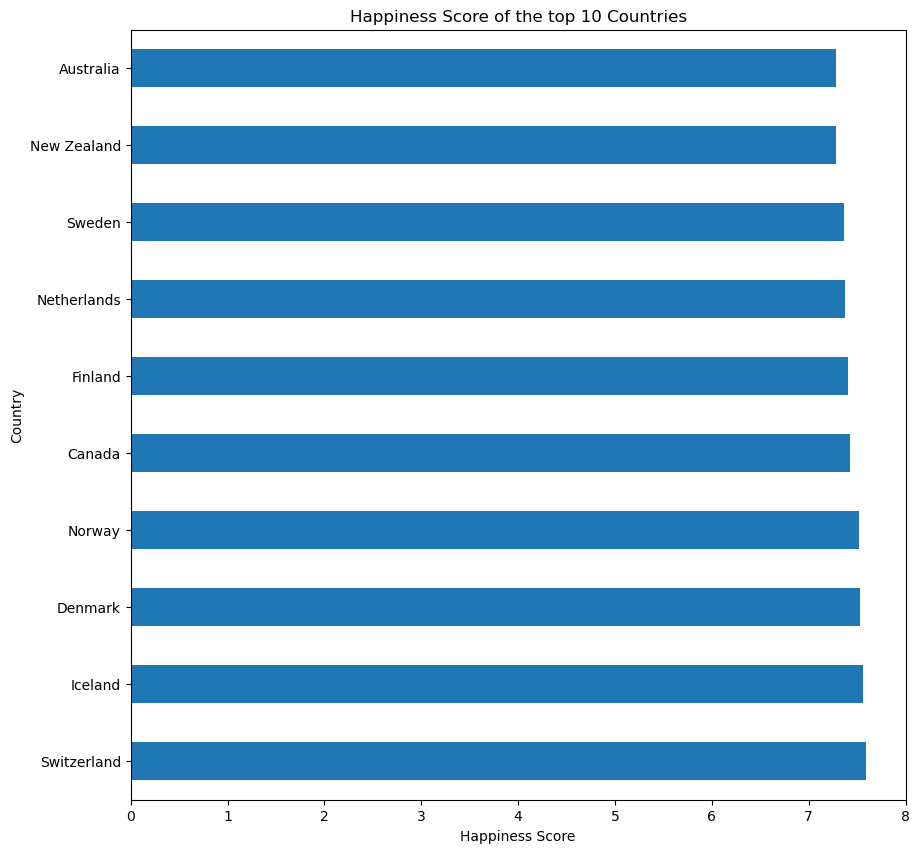

In [60]:
WHR['Happiness Score'].head(10).plot(xticks=np.arange(9), kind='barh', figsize= (10, 10))
plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')

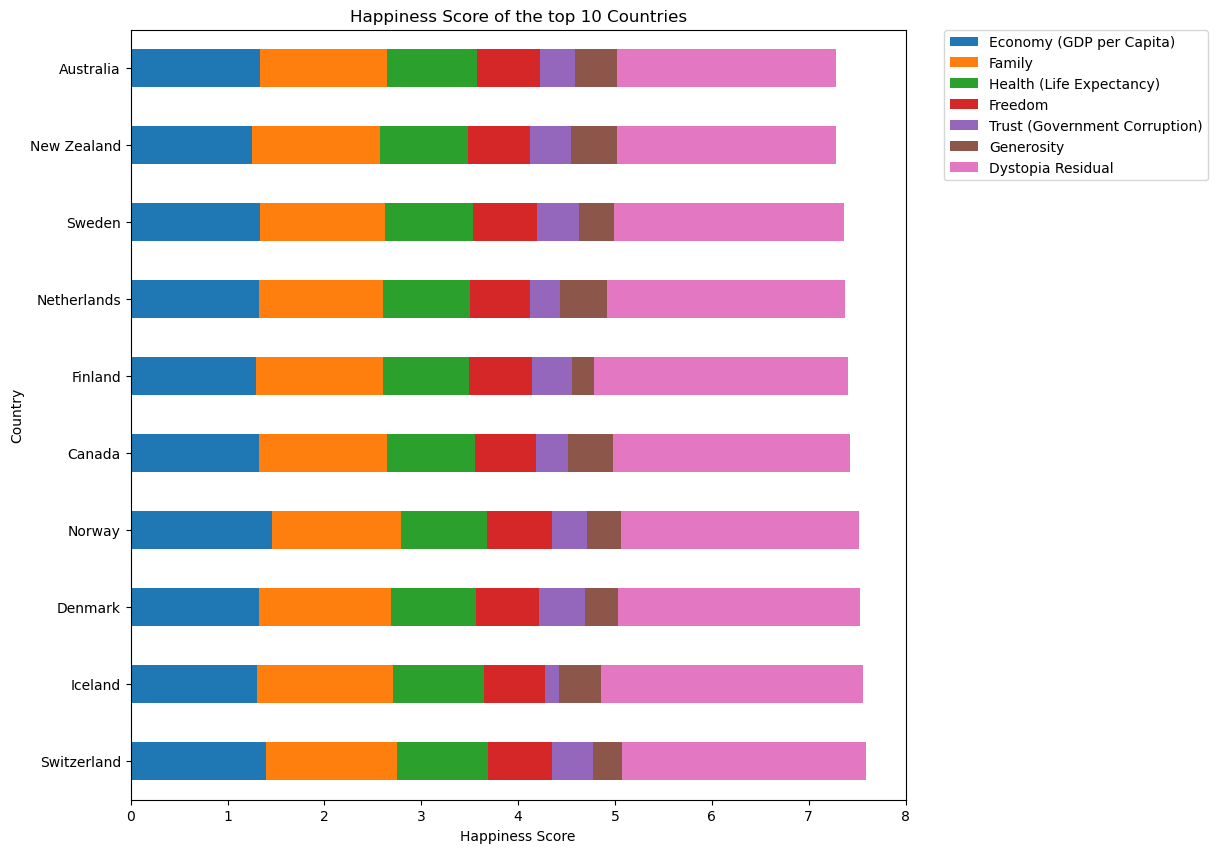

In [63]:
WHR[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']].head(10).plot(kind='barh',
                                                                xticks=np.arange(9), stacked=True, figsize= (10, 10))

plt.xlabel("Happiness Score")
plt.title('Happiness Score of the top 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Pairwise Scatter plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


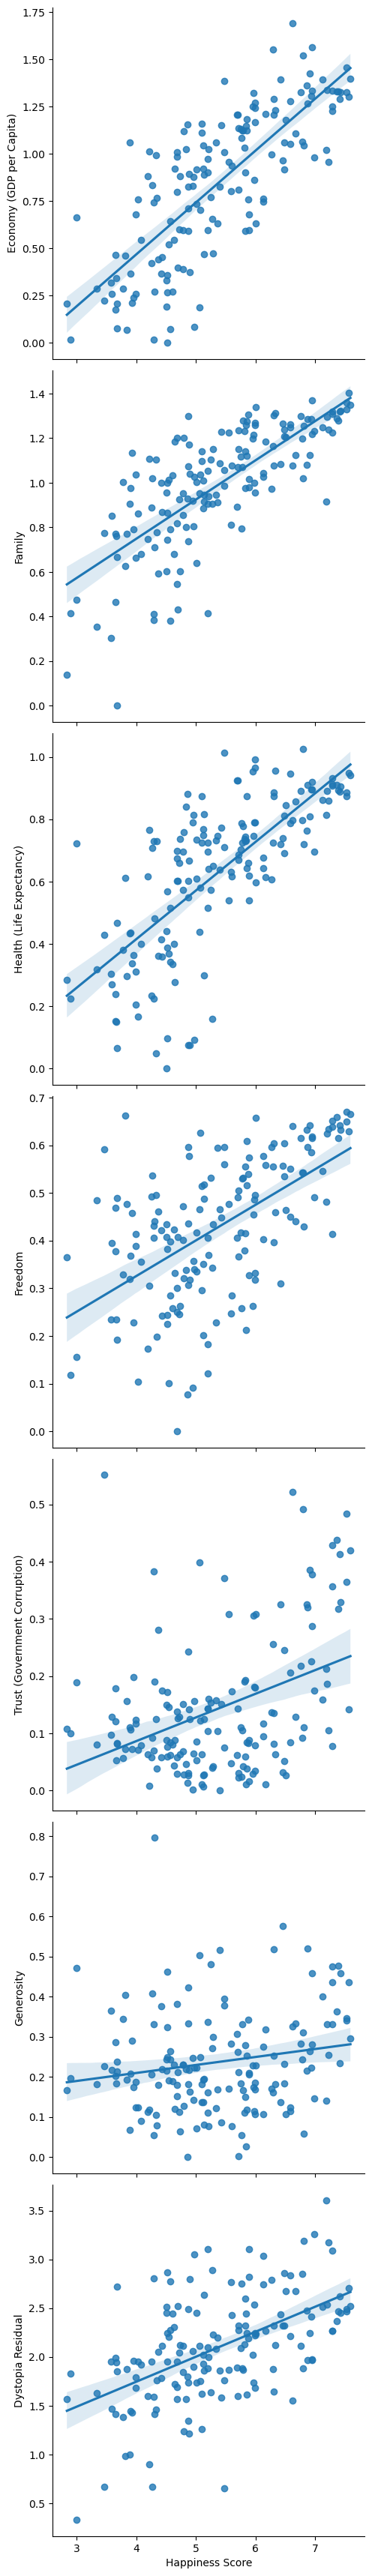

In [65]:
sns.pairplot(data=WHR, kind='reg', size = 5,
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


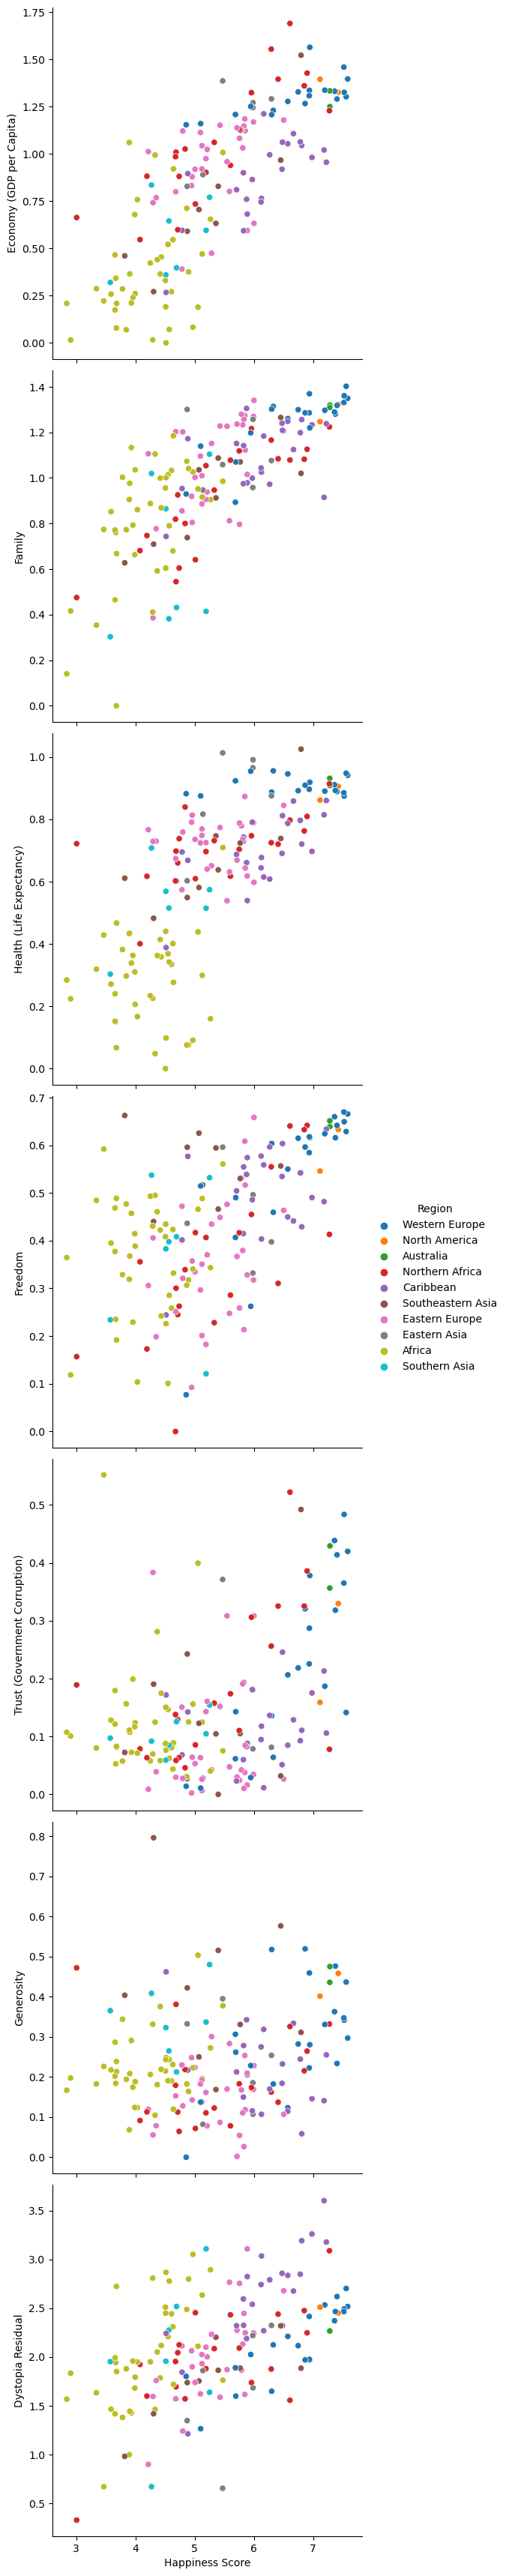

In [66]:
sns.pairplot(data=WHR, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])

# Correlation

In [67]:
WHR.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

In [68]:
WHR.corr(method="pearson", min_periods=20)["Happiness Score"].abs().sort_values(ascending=False)

Happiness Score                  1.000000
Happiness Rank                   0.992105
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                   0.177254
Name: Happiness Score, dtype: float64

In [69]:
WHR.corr(method="pearson", min_periods=20)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


C:\Users\sattu\AppData\Local\Temp\ipykernel_7764\1973345324.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

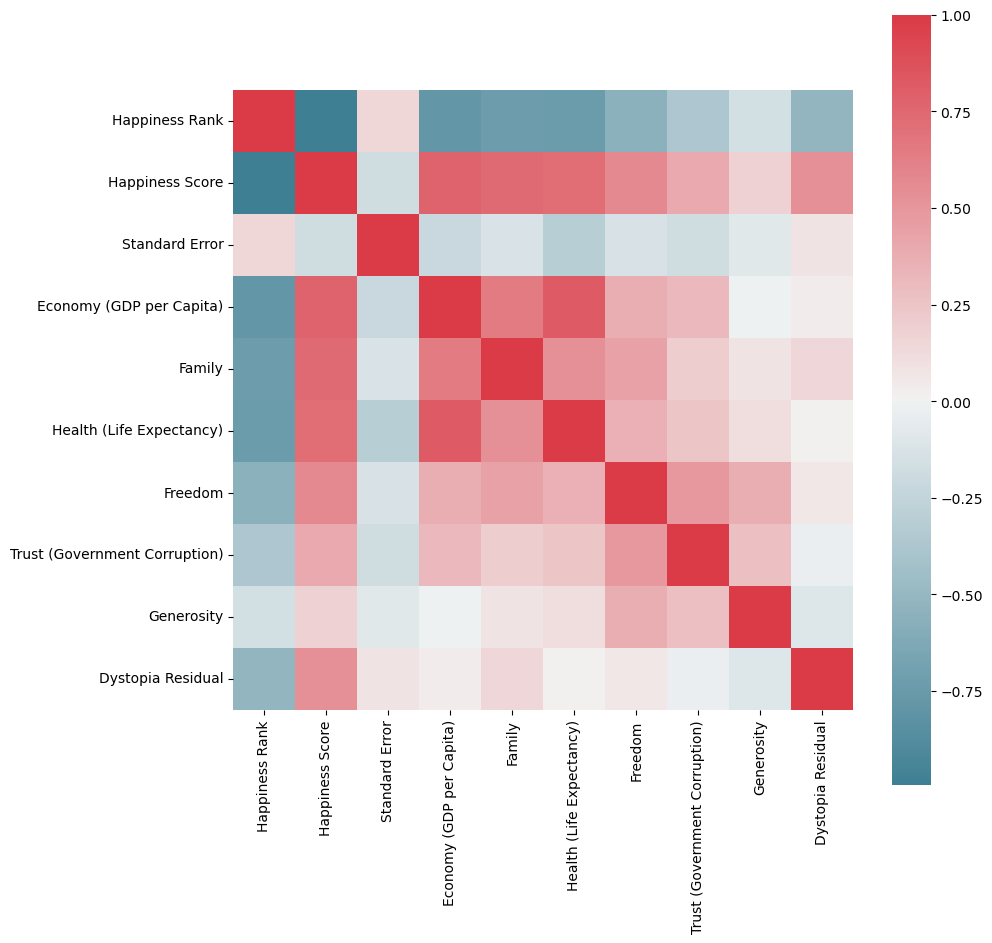

In [70]:
corr = WHR.corr(method = "pearson")

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [71]:
WHR[WHR['Happiness Score'] > 6].shape[0]

44

In [72]:
WHR[(WHR['Happiness Score'] > 6) & (WHR['Region'] == 'Western Europe')].shape[0]

16

In [73]:
float(len(WHR[(WHR['Happiness Score'] > 6) & (WHR['Region'] == 'Western Europe')]))/float(len(WHR[WHR['Happiness Score'] > 6]))


0.36363636363636365

In [74]:
print("The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is {0:.0%}".format(float(WHR[(WHR['Happiness Score'] > 6) & (WHR['Region'] == 'Western Europe')].shape[0]

)/float(WHR[WHR['Happiness Score'] > 6].shape[0])))

The probability that a randomly selected country with happiness score over 6.0 is form Western Europe is 36%


# Matrices

In [75]:
WHR.shape

(158, 11)

In [83]:
Western_Europe = []
North_America = []
Australia = []
Northern_Africa = []
Caribbean = []
Southeastern_Asia = []
Eastern_Europe = []
Eastern_Asia = []
Sub_Saharan_Africa = []
Southern_Asia = []

In [84]:
for x in WHR['Region']:
    if x == 'Western Europe':
         Western_Europe.append(1)
    else: Western_Europe.append(0)

In [85]:
for x in WHR['Region']:
    if x == 'North America':
         North_America.append(1)
    else: North_America.append(0)

In [86]:
for x in WHR['Region']:
    if x == 'Australia':
         Australia.append(1)
    else: Australia.append(0)

In [87]:
for x in WHR['Region']:
    if x == 'Northern Africa':
         Northern_Africa.append(1)
    else: Northern_Africa.append(0)

In [88]:
for x in WHR['Region']:
    if x == 'Caribbean':
         Caribbean.append(1)
    else: Caribbean.append(0)

In [89]:
for x in WHR['Region']:
    if x == 'Southeastern Asia':
         Southeastern_Asia.append(1)
    else: Southeastern_Asia.append(0)

In [90]:
for x in WHR['Region']:
    if x == 'Eastern Europe':
         Eastern_Europe.append(1)
    else: Eastern_Europe.append(0)

In [91]:
for x in WHR['Region']:
    if x == 'Eastern Asia':
         Eastern_Asia.append(1)
    else: Eastern_Asia.append(0)

In [92]:
for x in WHR['Region']:
    if x == 'Sub-Saharan Africa':
         Sub_Saharan_Africa.append(1)
    else: Sub_Saharan_Africa.append(0)

In [93]:
for x in WHR['Region']:
    if x == 'Southern Asia':
         Southern_Asia.append(1)
    else: Southern_Asia.append(0)

In [94]:
Matrix = pd.DataFrame(index=WHR.index)

In [ ]:
Matrix['Western Europe'] = Western_Europe
Matrix['Western Europe'] = Western_Europe

In [95]:
Matrix["Western Europe"] = Western_Europe
Matrix["North America"] = North_America
Matrix["Australia"] = Australia
Matrix["Northern Africa"] = Northern_Africa
Matrix["Caribbean"] = Caribbean
Matrix["Southeastern Asia"] = Southeastern_Asia
Matrix["Eastern Europe"] = Eastern_Europe
Matrix["Eastern Asia"] = Eastern_Asia
Matrix["Sub-Saharan Africa"] = Sub_Saharan_Africa
Matrix["Southern Asia"] = Southern_Asia

In [97]:
Matrix.head(30)

,Western Europe,North America,Australia,Northern Africa,Caribbean,Southeastern Asia,Eastern Europe,Eastern Asia,Sub-Saharan Africa,Southern Asia
Country,,,,,,,,,,
Switzerland,1,0,0,0,0,0,0,0,0,0
Iceland,1,0,0,0,0,0,0,0,0,0
Denmark,1,0,0,0,0,0,0,0,0,0
Norway,1,0,0,0,0,0,0,0,0,0
Canada,0,1,0,0,0,0,0,0,0,0
Finland,1,0,0,0,0,0,0,0,0,0
Netherlands,1,0,0,0,0,0,0,0,0,0
Sweden,1,0,0,0,0,0,0,0,0,0
New Zealand,0,0,1,0,0,0,0,0,0,0
